In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the data from the CSV file
data = pd.read_csv('train_2_2.csv')
test_data = pd.read_csv('test_2_2.csv')
ndata=data
#as the data is shuffled we are taking 20% of the train data as validation data
vdata = ndata[:int(len(ndata)*0.2)]
tdata = ndata[int(len(ndata)*0.2):]


#creating the KNN classifier class for data with 2 features and 3 classes {0,1,2}
class knn: 
    def __init__(self,data):
        # self.n = n
        self.data = data.values

    def predict(self,l,n):
        # print(l)
        x = (l[0])
        y = (l[1])
        dist = []
        for i in range(len(self.data)):
            temp = []
            temp.append((self.data[i][0]-x)**2 + (self.data[i][1]-y)**2)
            temp.append(self.data[i][2])
            # print(temp)
            dist.append(temp)
        dist.sort()
        # print(len(dist))
        count0=0
        count1=0
        count2=0
        for i in range(n):
            if dist[i][1]==0:
                count0+=1
            elif dist[i][1]==1:
                count1+=1
            else:
                count2+=1
        x = max(count0,count1,count2)
        if x==count0:
            return 0
        elif x==count1:
            return 1
        else:
            return 2

    def test_error(self,n,l):
        count =0
        for i in range(len(l)):
            # if i==0:
            #     print(l[i][0],l[i][1],l[i][2])
            if self.predict([l[i][0],l[i][1]],n) != l[i][2]:
                count+=1
        return count/len(l)
        

    def predict_list(self,l,n):
        ans = []
        for i in l:
            # print(i)
            ans.append(self.predict(i,n))
        return ans



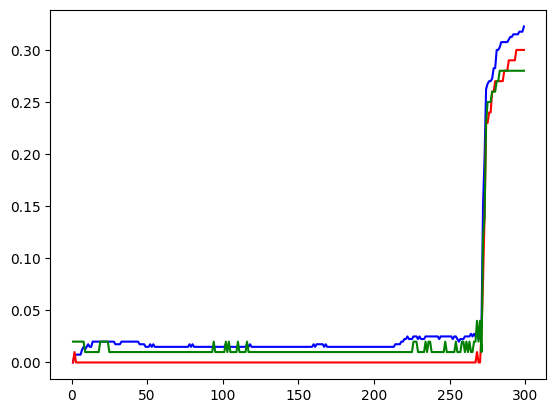

optimum k for train data is  1
optimum k for test data is  1
optimum k for valid data is  9


In [16]:
# initialising Knn object
predictor = knn(tdata)


#plotting the error vs K graph
x_axis = []
train_error = []
test_error = []
valid_error = []
for i in range (1,300):
    x_axis.append(i)
    train_error.append(predictor.test_error(i,tdata.values))
    test_error.append(predictor.test_error(i,test_data.values))
    valid_error.append(predictor.test_error(i,vdata.values))

# print(optimum_k)
plt.plot(x_axis,train_error,c = 'b',label = 'train error')
plt.plot(x_axis,test_error,c = 'r',label = 'test error')
plt.plot(x_axis,valid_error,c = 'g',label = 'valid error')
plt.show()

min_train_error = min(train_error)
min_test_error = min(test_error)
min_valid_error = min(valid_error)
opt_k_train = train_error.index(min_train_error)+1
opt_k_test = test_error.index(min_test_error)+1
opt_k_valid = valid_error.index(min_valid_error)+1
print("optimum k for train data is ",opt_k_train)
print("optimum k for test data is ",opt_k_test)
print("optimum k for valid data is ",opt_k_valid)




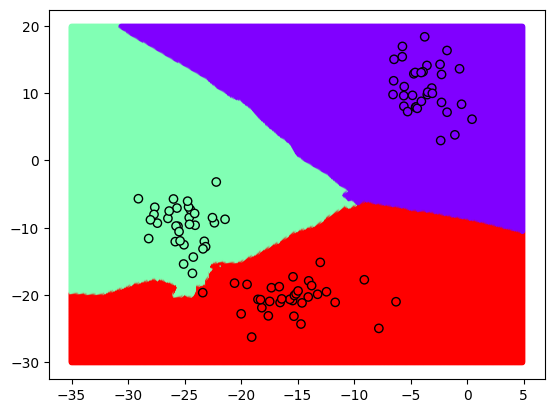

In [19]:
#plotting the classification boundaries and test cases
l= []
for i in range(-350,50):
    for j in range(-300,200):
        l.append([i/10,j/10])
new_points = np.array(l)

# predictor1 = knn(tdata)
predictions = predictor.predict_list(l,5)

X = test_data[['x', 'y']].values
y = test_data['label'].values
plt.scatter(new_points[:, 0], new_points[:, 1], c=predictions, marker='.', cmap='rainbow')
plt.scatter(X[:, 0], X[:, 1],c=y, cmap='rainbow',marker = 'o', edgecolor="black")


In [31]:
def confusion_matrix(y_true, y_pred):
    matrix = np.zeros((3, 3))
    for i in range(len(y_true)):
        actual = int(y_true[i])
        predicted = int(y_pred[i])
        # print(actual,predicted)
        matrix[actual][predicted] += 1
    return matrix


#plotting the confusion matrix
# print(type(test_data.values[:,:2]))
y_pred_test = predictor.predict_list(test_data.values[:,:2],1)
y_true_test = test_data.values[:,2]
print("confusion matrix for test data")
print(confusion_matrix(y_true_test,y_pred_test))
print()

y_pred_train = predictor.predict_list(tdata.values[:,:2],1)
y_true_train = tdata.values[:,2]
print("confusion matrix for train data")
print(confusion_matrix(y_true_train,y_pred_train))
print()

y_pred_valid = predictor.predict_list(vdata.values[:,:2],1)
y_true_valid = vdata.values[:,2]
print("confusion matrix for valid data")
print(confusion_matrix(y_true_valid,y_pred_valid))

confusion matrix for test data
[[34.  0.  0.]
 [ 0. 33.  0.]
 [ 0.  0. 33.]]

confusion matrix for train data
[[128.   0.   0.]
 [  0. 136.   0.]
 [  0.   0. 136.]]

confusion matrix for valid data
[[39.  0.  0.]
 [ 0. 31.  0.]
 [ 0.  2. 28.]]
